<a href="https://colab.research.google.com/github/balanireekshan/Data-Science-Intern-Assignment/blob/main/Bala_Nireekshan_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [21]:
# Merge datasets
data = transactions.merge(customers, on='CustomerID')

In [22]:
# Feature engineering: Aggregate transaction data by CustomerID
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spend
    'Quantity': 'sum',    # Total quantity purchased
    'TransactionID': 'count'  # Number of transactions
}).rename(columns={'TransactionID': 'TransactionCount'})

In [23]:
# Include profile data
customer_features = customer_features.merge(
    customers[['CustomerID', 'Region']],
    on='CustomerID'
)

In [24]:
# One-hot encode categorical variables (e.g., Region)
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [25]:
# Drop CustomerID for clustering
features = customer_features.drop('CustomerID', axis=1)

In [26]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [27]:
# Elbow method to determine optimal clusters
wcss = []  # Within-cluster sum of squares
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

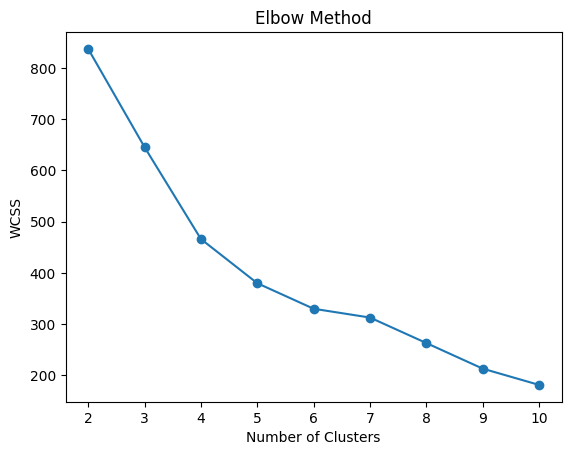

In [28]:
# Plot elbow curve
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
# Perform clustering with the optimal number of clusters (e.g., 4 for this example)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [30]:
# Add cluster labels to customer features
customer_features['Cluster'] = clusters

In [31]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, clusters)
print(f'Davies-Bouldin(DB) Index: {db_index}')

Davies-Bouldin(DB) Index: 0.9880667545355788


In [32]:
# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3963774629731389


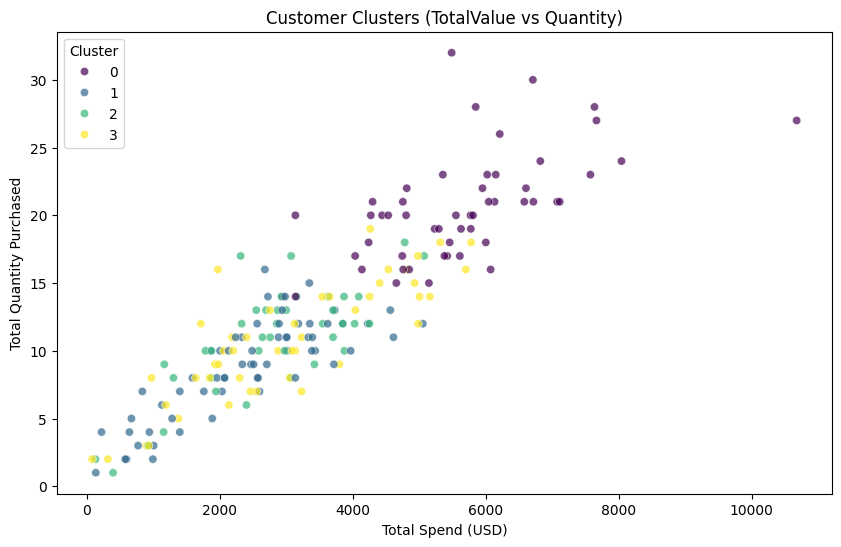

In [34]:
# Visualize clusters (e.g., using TotalValue vs. Quantity)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_features['TotalValue'],
    y=customer_features['Quantity'],
    hue=customer_features['Cluster'],
    palette='viridis',
    alpha=0.7
)
plt.title('Customer Clusters (TotalValue vs Quantity)')
plt.xlabel('Total Spend (USD)')
plt.ylabel('Total Quantity Purchased')
plt.legend(title='Cluster')
plt.show()